In [1]:
### importing required resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [7]:
### specifying file location (dont forget to change forward slash to backward)
file = "//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/raw_tile_surf.xlsx"

In [8]:
### reading the file into dataframe
londes = pd.read_excel(file)

In [60]:
# looking at first 10 rows
londes.head(10)

,Date,Temp (oC),Rain (mm),Tile flow (L/s),Surface flow (L/s)
0,2011-10-03 16:00:00,11.783,0.0,0.0,0.0
1,2011-10-03 16:15:00,11.565,0.0,0.0,0.0
2,2011-10-03 16:30:00,11.662,0.0,0.0,0.0
3,2011-10-03 16:45:00,11.467,0.0,0.0,0.0
4,2011-10-03 17:00:00,12.050,0.0,0.0,0.0
5,2011-10-03 17:15:00,12.195,0.0,0.0,0.0
6,2011-10-03 17:30:00,11.832,0.0,0.0,0.0
7,2011-10-03 17:45:00,11.856,0.0,0.0,0.0
8,2011-10-03 18:00:00,12.001,0.0,0.0,0.0
9,2011-10-03 18:15:00,11.783,0.0,0.0,0.0


In [53]:
# getting column names
for col in londes.columns:
    print(col)

Date
Temp (oC)
Rain (mm)
Tile flow (L/s)
Surface flow (L/s)


In [20]:
# deleting unwanted columns (counted from 0)
londes = londes.drop(londes.columns[[1, 2, 3, 6, 8, 10, 11, 12, 13, 14]], axis=1)

In [54]:
londes.head()

,Date,Temp (oC),Rain (mm),Tile flow (L/s),Surface flow (L/s)
0,2011-10-03 16:00:00,11.783,0.0,0.0,0.0
1,2011-10-03 16:15:00,11.565,0.0,0.0,0.0
2,2011-10-03 16:30:00,11.662,0.0,0.0,0.0
3,2011-10-03 16:45:00,11.467,0.0,0.0,0.0
4,2011-10-03 17:00:00,12.050,0.0,0.0,0.0


In [61]:
# checking format of all variables
londes.dtypes

Date                  datetime64[ns]
Temp (oC)                    float64
Rain (mm)                    float64
Tile flow (L/s)              float64
Surface flow (L/s)           float64
dtype: object

In [68]:
# dividing every column into separate df
londestemp = londes[['Date', 'Temp (oC)']]
londesrain = londes[['Date', 'Rain (mm)']]
londestile = londes[['Date', 'Tile flow (L/s)']]
londessurf = londes[['Date', 'Surface flow (L/s)']]

In [69]:
### dropping all rows with missing values and rewriting the dataframe
londestemp.dropna(axis = 0, how = 'any', inplace=True) 
londesrain.dropna(axis = 0, how = 'any', inplace=True) 
londestile.dropna(axis = 0, how = 'any', inplace=True) 
londessurf.dropna(axis = 0, how = 'any', inplace=True) 
#axis=0 means rows are dropped, 1 means columns;
# how=any means rows where any column value is na is dropped, all would mean drop only rows where all columns are na;
# inplace=True means that the dataframe is rewritten

<ipython-input-69-4bbf6a744d69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londestemp.dropna(axis = 0, how = 'any', inplace=True)
<ipython-input-69-4bbf6a744d69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londesrain.dropna(axis = 0, how = 'any', inplace=True)
<ipython-input-69-4bbf6a744d69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londestile.dropna(axis = 0, how = 'any', inplace=True)
<ipython-input-69-4bbf6a744d69>

In [79]:
### finding daily averages

### setting date as index in the new data set
londestemp.set_index('Date')

### resampling data so that we have daily averages, max and min of the temperatures
daily_mean = londestemp.resample('D', on='Date').mean()
daily_max = londestemp.resample('D', on='Date').max()
daily_min = londestemp.resample('D', on='Date').min()


In [80]:
# changing names of the columns
daily_mean.rename(columns={'Temp (oC)':'t_avg'}, inplace=True)
daily_max.rename(columns={'Temp (oC)':'t_max'}, inplace=True)
daily_min.rename(columns={'Temp (oC)':'t_min'}, inplace=True)

In [81]:
# checking if the code worked
daily_min.head()

,Date,t_min
Date,,
2011-10-03,2011-10-03 16:00:00,9.534
2011-10-04,2011-10-04 00:00:00,6.687
2011-10-05,2011-10-05 00:00:00,5.668
2011-10-06,2011-10-06 00:00:00,6.712
2011-10-07,2011-10-07 00:00:00,7.795


In [82]:
# combining temp datasets
londestemp_daily = pd.concat([daily_mean, daily_max, daily_min], axis=1)

In [83]:
# checking if the merge was succesful
londestemp_daily.head()

,t_avg,Date,t_max,Date,t_min
Date,,,,,
2011-10-03,11.068875,2011-10-03 23:45:00,12.195,2011-10-03 16:00:00,9.534
2011-10-04,12.507812,2011-10-04 23:45:00,19.389,2011-10-04 00:00:00,6.687
2011-10-05,13.469906,2011-10-05 23:45:00,21.963,2011-10-05 00:00:00,5.668
2011-10-06,13.698354,2011-10-06 23:45:00,21.413,2011-10-06 00:00:00,6.712
2011-10-07,16.033823,2011-10-07 23:45:00,24.339,2011-10-07 00:00:00,7.795


In [85]:
# deleting unnecessary columns
londestemp_daily.drop(londestemp_daily.columns[[1, 3]], axis=1, inplace=True)

In [86]:
#checking
londestemp_daily.head()

,t_avg,t_max,t_min
Date,,,
2011-10-03,11.068875,12.195,9.534
2011-10-04,12.507812,19.389,6.687
2011-10-05,13.469906,21.963,5.668
2011-10-06,13.698354,21.413,6.712
2011-10-07,16.033823,24.339,7.795


In [87]:
# exporting as excel
londestemp_daily.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_daily_temp.xlsx')

In [88]:
# Now working with Rain data
londesrain.head()

,Date,Rain (mm)
0,2011-10-03 16:00:00,0.0
1,2011-10-03 16:15:00,0.0
2,2011-10-03 16:30:00,0.0
3,2011-10-03 16:45:00,0.0
4,2011-10-03 17:00:00,0.0


In [89]:
### finding daily averages

### setting date as index in the new data set
londesrain.set_index('Date')

### resampling data so that we have daily ppt
daily_ppt = londesrain.resample('D', on='Date').sum()

In [91]:
daily_ppt.rename(columns={'Rain (mm)':'ppt_mm'}, inplace=True)

In [92]:
# checking
daily_ppt.head()

,ppt_mm
Date,
2011-10-03,0.0
2011-10-04,0.0
2011-10-05,0.0
2011-10-06,0.0
2011-10-07,0.0


In [93]:
# exporting as excel
daily_ppt.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_daily_ppt.xlsx')

In [94]:
### finding monthly averages
### resampling data so that we have monthly ppt
monthly_ppt = londesrain.resample('M', on='Date').sum()

In [95]:
#checking
monthly_ppt.head()

,Rain (mm)
Date,
2011-10-31,112.2
2011-11-30,79.7
2011-12-31,58.4
2012-01-31,37.0
2012-02-29,13.8


In [96]:
# renaming columns
monthly_ppt.rename(columns={'Rain (mm)':'ppt_mm'}, inplace=True)

In [97]:
# exporting as excel
monthly_ppt.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_monthly_ppt.xlsx')

In [98]:
### finding monthly averages
### resampling data so that we have monthly ppt
yearly_ppt = londesrain.resample('Y', on='Date').sum()

In [99]:
# renaming columns
yearly_ppt.rename(columns={'Rain (mm)':'ppt_mm'}, inplace=True)

In [100]:
#checking
yearly_ppt.head()

,ppt_mm
Date,
2011-12-31,250.300
2012-12-31,660.600
2013-12-31,1107.400
2014-12-31,767.842
2015-12-31,436.382


In [101]:
# exporting as excel
yearly_ppt.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_yearly_ppt.xlsx')

In [ ]:
# tile flow is in L/s for every 15 min, and we want in mm
# so we multiply tile flow column data by (15 x 60 s) to get in L and then divide by 1000 to get ans in m3 (volume)
# then we divide by the area which is 83344 m2 to get ans in m (depth), and then multiply by 1000 to get ans in mm

In [103]:
# first we rename the column
londestile.rename(columns={'Tile flow (L/s)':'tile'}, inplace=True)

C:\Users\dhimanj\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [105]:
# now the math
x=(((15*60)/1000)/83344)*1000
londestile['tile']=x*londestile['tile']

<ipython-input-105-11e95690de51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londestile['tile']=x*londestile['tile']


In [108]:
# now doing the same thing for tiles

londestile.set_index('Date')
### resampling data
daily_tile = londestile.resample('D', on='Date').sum()
monthly_tile = londestile.resample('M', on='Date').sum()
yearly_tile = londestile.resample('Y', on='Date').sum()

# writing to excel
# exporting as excel
daily_tile.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_daily_tile.xlsx')
monthly_tile.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_monthly_tile.xlsx')
yearly_tile.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_yearly_tile.xlsx')

In [111]:
# now doing the same thing for surfQ
# londessurf.rename(columns={'Surface flow (L/s)':'surf_mm'}, inplace=True)
londessurf['surf_mm']=x*londessurf['surf_mm']

londessurf.set_index('Date')

### resampling data
daily_surf = londessurf.resample('D', on='Date').sum()
monthly_surf = londessurf.resample('M', on='Date').sum()
yearly_surf = londessurf.resample('Y', on='Date').sum()

# writing to excel
# exporting as excel
daily_surf.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_daily_surf.xlsx')
monthly_surf.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_monthly_surf.xlsx')
yearly_surf.to_excel('//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/LONDES/londes_site_data/new_londes_data/received_from_Baljeet_Narayan/clean_londes_yearly_surf.xlsx')

<ipython-input-111-be148856fde4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  londessurf['surf_mm']=x*londessurf['surf_mm']


Text(0, 0.5, 'Annual observed precipitation (mm)')

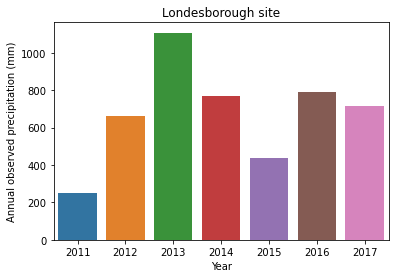

In [150]:
# plotting yearly rain, tile and surf data for comparison
# first we convert index back to default (not Date)
#yearly_ppt = yearly_ppt.reset_index()
g = sns.barplot(data=yearly_ppt, x="Date", y="ppt_mm")
g.set_xticks(range(len(yearly_ppt)))
g.set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017'])
plt.title('Londesborough site')
plt.xlabel('Year')
plt.ylabel('Annual observed precipitation (mm)')

Text(0, 0.5, 'Annual observed tile flow (mm)')

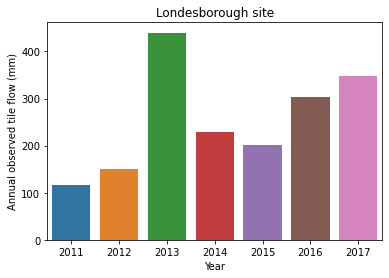

In [149]:
# plotting yearly rain, tile and surf data for comparison
# first we convert index back to default (not Date)
yearly_tile = yearly_tile.reset_index()
g = sns.barplot(data=yearly_tile, x="Date", y="tile")
g.set_xticks(range(len(yearly_tile)))
g.set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017'])
plt.title('Londesborough site')
plt.xlabel('Year')
plt.ylabel('Annual observed tile flow (mm)')

Text(0, 0.5, 'Annual observed surface runoff (mm)')

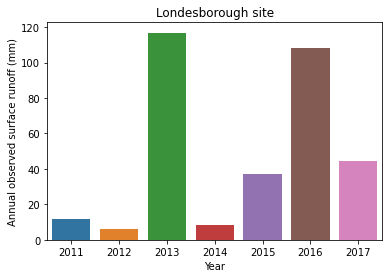

In [148]:
# plotting yearly rain, tile and surf data for comparison
# first we convert index back to default (not Date)
yearly_surf = yearly_surf.reset_index()
g = sns.barplot(data=yearly_surf, x="Date", y="surf_mm")
g.set_xticks(range(len(yearly_surf)))
g.set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017'])
plt.title('Londesborough site')
plt.xlabel('Year')
plt.ylabel('Annual observed surface runoff (mm)')

In [138]:
# data collected from Goderich ON weather station - ECCC
goderich_ppt = {'Year':['2012', '2013', '2014', '2015', '2016', '2017'], 'ppt_mm':[600.3, 944.5, 812.2, 663.5, 895, 981.6]}

Text(0, 0.5, 'annual precipitation (mm)')

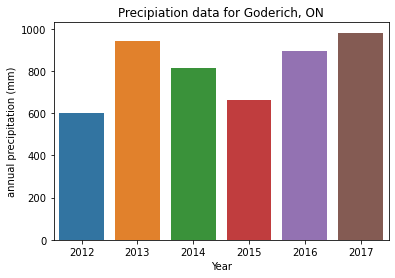

In [142]:
# creating graph
sns.barplot(data=goderich_ppt, x="Year", y="ppt_mm").set_title('Precipiation data for Goderich, ON')
plt.xlabel('Year')
plt.ylabel('annual precipitation (mm)')
